# Descriptive and Inferential Statistics

In [238]:
# import pandas for structuring the data
import pandas as pd
import pandas_profiling

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics, tree
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ske


## 1. Cleaning the data

In [148]:
df = pd.read_excel("Haircut Tip Amounts.xlsx", header=2, usecols="A:F")
df.head()

C:\Users\sebas\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Tip amount,Time,Day,Culture,Married,Age
0,0,5.0,Fri,I,NM,30.0
1,1,2.0,Tue,E,NM,10.0
2,1,7.0,Tues,I,NM,35.0
3,2,5.0,Mon,I,NM,35.0
4,2,12.0,Fri,M,NM,15.0


### 1.1 Types

In [149]:
#Define types
df.dtypes

Tip amount     object
Time          float64
Day            object
Culture        object
Married        object
Age           float64
dtype: object

In [150]:
#Set all days to lowercase
df['Day'] = df['Day'].str.lower()
df.Day.head()

0     fri
1     tue
2    tues
3     mon
4     fri
Name: Day, dtype: object

In [151]:
#Format all time entries
#df.loc[df.Time < 10, "Time"] = df.Time +12
#df.Day.replace(0, df[i].mean())
df.head()

,Tip amount,Time,Day,Culture,Married,Age
0,0,5.0,fri,I,NM,30.0
1,1,2.0,tue,E,NM,10.0
2,1,7.0,tues,I,NM,35.0
3,2,5.0,mon,I,NM,35.0
4,2,12.0,fri,M,NM,15.0


In [152]:
#Rows to remove
df.isna().sum()

Tip amount    1
Time          2
Day           2
Culture       2
Married       2
Age           2
dtype: int64

### 1.2 Cleaning

In [153]:
#Remove rows that has empty values and irelevant values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
df = df.drop(rows_with_NaN.index.values)
df.isna().sum()

Tip amount    0
Time          0
Day           0
Culture       0
Married       0
Age           0
dtype: int64

In [154]:
#Find irregular rows from "Married" column and change value to mode
df.loc[(df.Married != "NM") & (df.Married != "M"), "Married"] = df["Married"].mode()
(df.Married == "kid").sum()

0

In [155]:
df.loc[(df.Culture == "H") | (df.Culture == "V"), "Culture"] = df["Culture"].mode()
(df.Culture == "V").sum()

0

In [156]:
#Change column "Tip amount" to float type
df["Tip amount"] = df["Tip amount"].convert_dtypes()
df.dtypes

Tip amount    Float64
Time          float64
Day            object
Culture        object
Married        object
Age           float64
dtype: object

In [157]:
for i in df.Day:
    if len(i) > 3:
        df.Day = df.Day.replace(i, i[:3])

In [158]:
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['Married'] = le.fit_transform(df['Married'])
    processed_df['Culture'] = le.fit_transform(df['Culture'])
    processed_df['Day'] = le.fit_transform(df['Day'])
    return processed_df

In [159]:
#Change column "Married", "Day" and "Culture" to numeric types contained in a copy
preprocessor(df).dtypes

Tip amount    Float64
Time          float64
Day             int32
Culture         int32
Married         int32
Age           float64
dtype: object

In [42]:
df.dtypes

Tip amount    Float64
Time          float64
Day            object
Culture        object
Married        object
Age           float64
dtype: object

### 1.3 profilling

In [125]:
pandas_profiling.ProfileReport(preprocessor(df)).to_file("hair_salon_report2.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Exploring the data

<AxesSubplot:xlabel='Tip amount'>

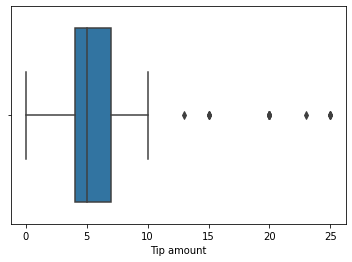

In [171]:
#outliers
sns.boxplot(x = df['Tip amount'])

In [167]:
outliner = df[df['Tip amount'] == df['Tip amount'].max()]
df = df.drop(outliner.index)

most tips wednesday


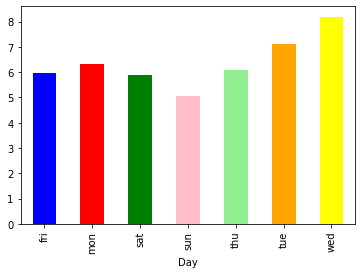

In [168]:
df.groupby('Day')['Tip amount'].mean().plot(kind='bar',color=['blue', 'red','green', 'pink','lightgreen','orange','yellow'])
print('most tips wednesday')

<AxesSubplot:xlabel='Culture'>

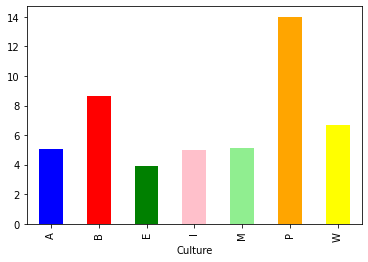

In [172]:
df.groupby('Culture')['Tip amount'].mean().plot(kind='bar',color=['blue', 'red','green', 'pink','lightgreen','orange','yellow'])

<AxesSubplot:>

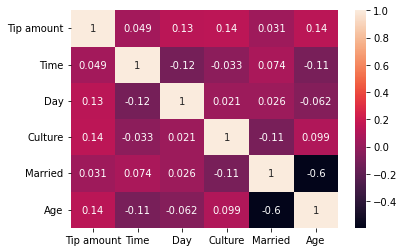

In [173]:
dfp = preprocessor(df)
sns.heatmap(dfp.corr(), annot=True)

In [132]:
df.groupby('Culture').count()

,Tip amount,Time,Day,Married,Age
Culture,,,,,
A,13,13,13,13,13
B,4,4,4,4,4
E,8,8,8,8,8
H,1,1,1,1,1
I,39,39,39,39,39
M,25,25,25,25,25
P,14,14,14,14,14
V,1,1,1,1,1
W,127,127,127,126,127


## 3. In depth analysis

In [174]:
# Split the data into input and output
x = dfp.drop(['Tip amount'], axis=1).values
y = dfp['Tip amount'].values

In [220]:
# Split the data into train and test sets
# 80% of the dataset will be used for training and 20% will be used for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [221]:
# Select a method
dt = tree.DecisionTreeClassifier(max_depth=3)
# Train a model
dt.fit(x_train, y_train.astype(int))
# Validate the model
dt.score(x_test, y_test.astype(int))

0.3191489361702128

In [230]:
# Try another method
rf = ske.RandomForestClassifier(n_estimators=50)
rf.fit (x_train, y_train.astype(int))
rf.score (x_test, y_test.astype(int))

0.2765957446808511

In [237]:
# Try another method
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb.fit (x_train, y_train.astype(int))
gb.score (x_test, y_test.astype(int))

0.2127659574468085

In [241]:
# Test the classifier with the test input data
prediction = dt.predict(x_test)
prediction

array([1, 2, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5])

C:\Users\sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

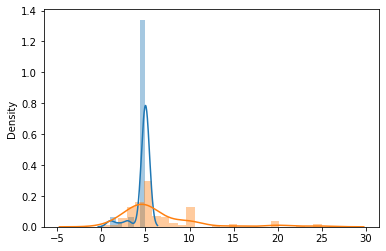

In [251]:
sns.distplot(prediction)
sns.distplot(y)